In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Memuat dataset
file_path = '/kaggle/input/member-gym/gym_members_exercise_tracking.csv'  # Ubah dengan path dataset Anda
data = pd.read_csv(file_path)

# Pengecekan nilai hilang
print("Jumlah Nilai Hilang per Kolom:")
print(data.isnull().sum())

# Menangani nilai hilang (jika ada)
# Isi nilai hilang pada kolom numerik dengan rata-rata
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

# Pengecekan duplikasi
duplikasi = data.duplicated().sum()
print(f"\nJumlah Baris Duplikasi: {duplikasi}")

# Menghapus duplikasi (jika ada)
if duplikasi > 0:
    data = data.drop_duplicates()


Jumlah Nilai Hilang per Kolom:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Jumlah Baris Duplikasi: 0


In [2]:
# Encoding kategorikal
data_encoded = pd.get_dummies(data, columns=["Gender", "Workout_Type"], drop_first=True)

# Mendefinisikan fitur (X) dan target (y)
X = data_encoded.drop(columns=["Calories_Burned"])  # Kolom target
y = data_encoded["Calories_Burned"]

# Membagi data menjadi data training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nUkuran Data Training dan Testing:")
print(f"Data Training: {X_train.shape}, Data Testing: {X_test.shape}")



Ukuran Data Training dan Testing:
Data Training: (778, 16), Data Testing: (195, 16)


In [3]:
# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi pada data testing
y_pred = model.predict(X_test)



Hasil Evaluasi Model:
Mean Squared Error (MSE): 1646.18
R-squared (R2): 0.98


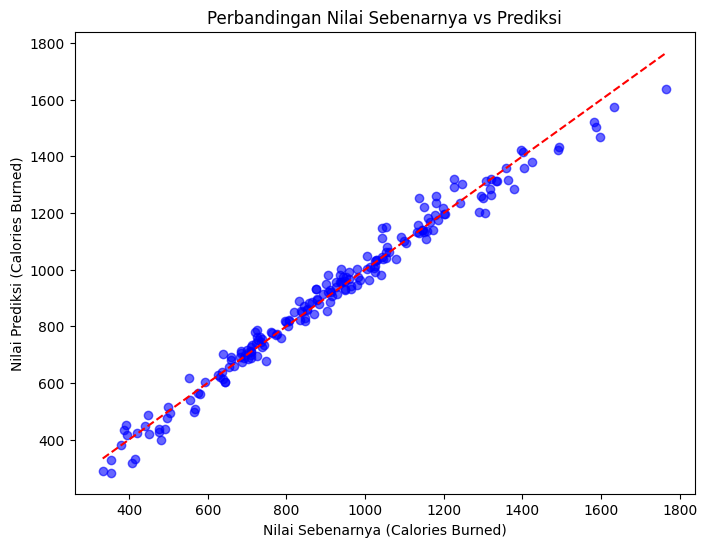

In [4]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nHasil Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualisasi Hasil Prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Nilai Sebenarnya (Calories Burned)")
plt.ylabel("Nilai Prediksi (Calories Burned)")
plt.title("Perbandingan Nilai Sebenarnya vs Prediksi")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
